In [16]:
from run_all import run

import os
import numpy as np
import argparse
import itertools
from torchvision.transforms import InterpolationMode
import pickle

from parse_args import parse_args
from attack import run_one_attack

from collections import defaultdict

In [18]:
# load experiment results
with open('attack_results.pkl', 'rb') as f:
    results = pickle.load(f)

# separate results by epsilon
results_by_name = defaultdict(list)
for x in results:
    epsilon = x[2]
    name = ",".join([str(y) for y in x[3:5]])
        # + f"_{'BL' if x[5] == InterpolationMode.BILINEAR else 'NN'}" 
        # + x[6] 
    test_acc = x[7].item()

    # print(epsilon, name, test_acc)

    results_by_name[name].append((epsilon, test_acc))



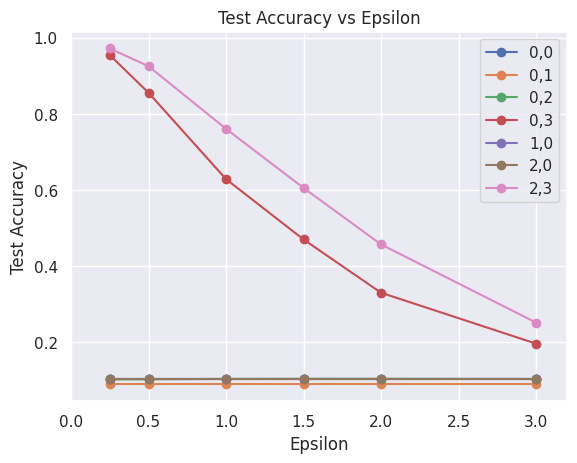

In [26]:
# graph results
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

for name, results in results_by_name.items():
    epsilons, test_accs = zip(*results)
    # plot with dots at each epsilon
    plt.plot(epsilons, test_accs, label=name, marker='o')



# set x range to 0 to 3
plt.xlim(0, 3.2)

plt.legend()
plt.xlabel("Epsilon")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Epsilon")
plt.show()

